<a href="https://colab.research.google.com/github/Premjit1/Hotel-booking-analysis/blob/main/Hotel_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.options.display.max_columns = None

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Hotel Bookings.csv'

In [5]:
df = pd.read_csv(path)

In [6]:
df.describe

<bound method NDFrame.describe of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27

In [7]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [9]:
# dealing with missing values
df.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

In [10]:
## let us the Drop Rows where there is no adult, baby and child
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

In [11]:
## If no id of agent or company is null, just replace it with 0
df[['agent','company']] = df[['agent','company']].fillna(0.0)


In [12]:

## For the missing values in the country column, replace it with mode (value that appears most often)
df['country'].fillna(df.country.mode().to_string(), inplace=True)

In [13]:
## for missing children value, replace it with rounded mean value
df['children'].fillna(round(df.children.mean()), inplace=True)

In [14]:
#for smooth EDA service let us do some data type conversion
## convert datatype of these columns from float to integer
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [15]:
#lets create a basic function in python for plotting
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax)
        
    
    plt.show()

In [16]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


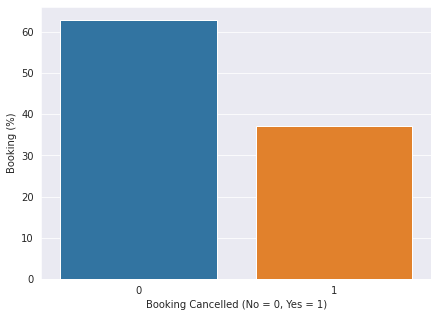

In [17]:
#lets see some basic assumptions
# 1. how many booking were cancelled
x,y = get_count(df['is_canceled'])
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


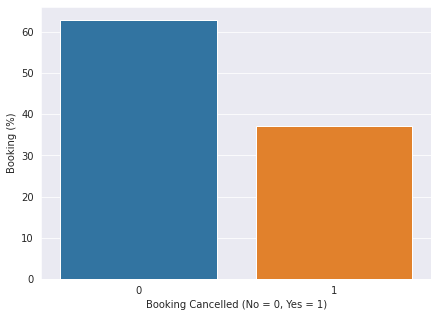

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 0 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 1 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


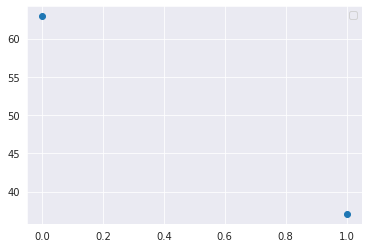

In [19]:
#lets see some basic assumptions
# 1. how many booking were cancelled
x,y = get_count(df['is_canceled'])
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')
plt.scatter(x, y)
plt.legend(x,y)
plt.show()

In [20]:
# for let us For further analysis, Select only those booking which did not get cancelled.
df_not_canceled = df[df['is_canceled'] == 0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


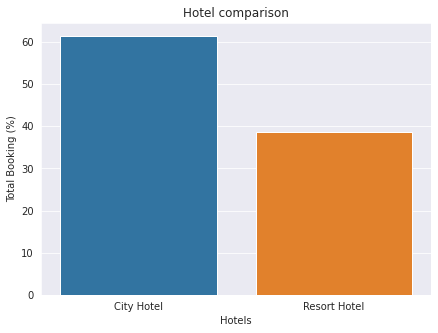

In [21]:
# assumption  2. What is the booking ratio between Resort Hotel and City Hotel?
x,y = get_count(df_not_canceled['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


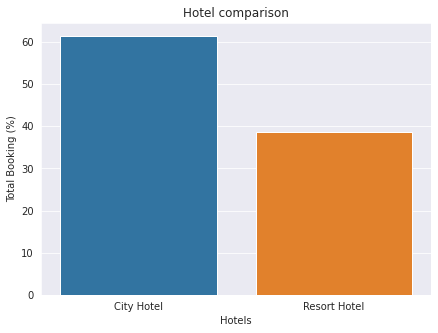

In [23]:
# assumption  2. What is the booking ratio between Resort Hotel and City Hotel?
x,y = get_count(df_not_canceled['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


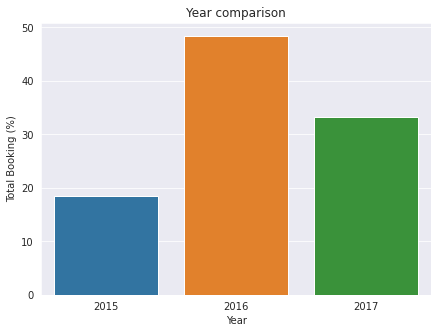

In [27]:
# assumption  3. What is the percentage of booking for each year?
x,y = get_count(df_not_canceled['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')

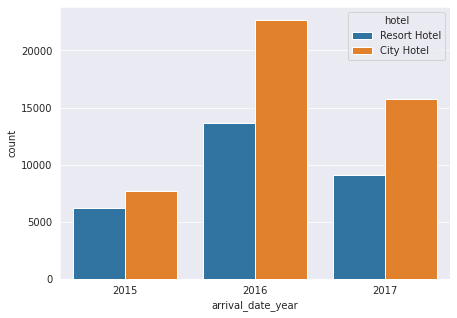

In [28]:
#now lets look hotel wise booking
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


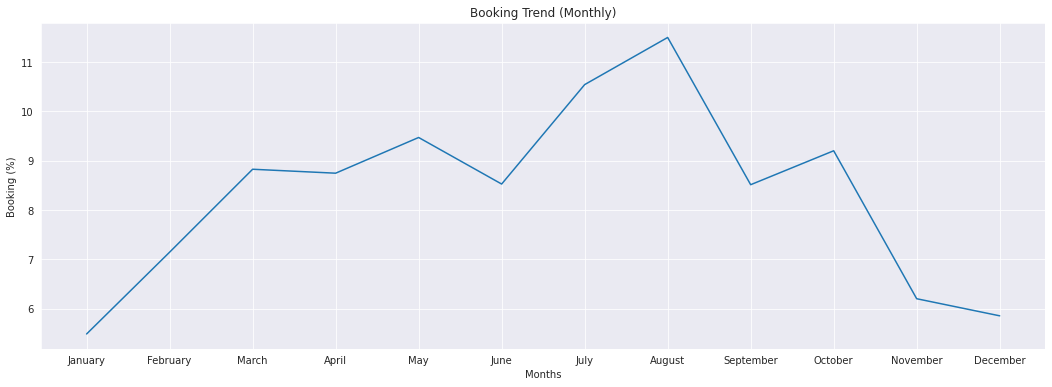

In [29]:
# Which is the most busy month for hotel?
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100


#sns.lineplot(x, y.values)
plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


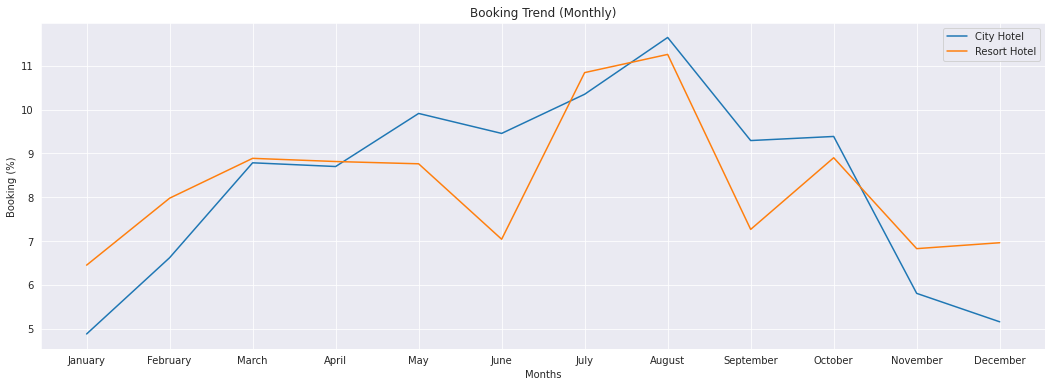

In [31]:
#comparision of 2 hotels
## Order of months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


## Select only City Hotel
sorted_months = df_not_canceled.loc[df.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100



## Select only Resort Hotel
sorted_months = df_not_canceled.loc[df.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100






## Draw the line plot

fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')


sns.lineplot(x1, y1.values, label='City Hotel')
sns.lineplot(x1, y2.values, label='Resort Hotel')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


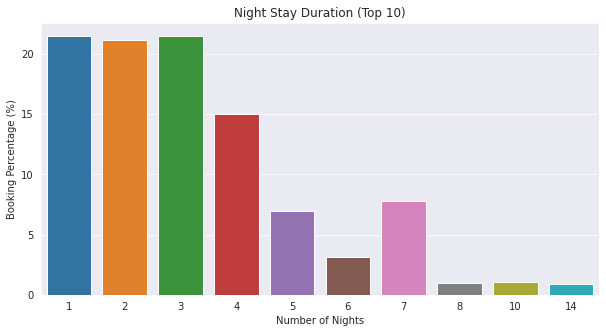

In [32]:
# how long people stay in hotel
total_nights = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


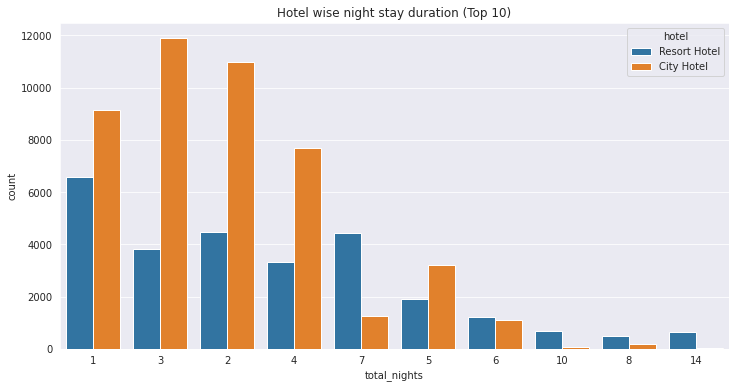

In [33]:
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax);

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


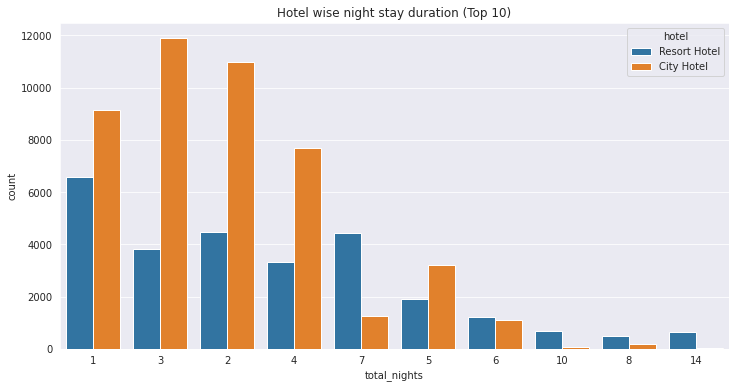

In [ ]:
# hotel room type booking
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


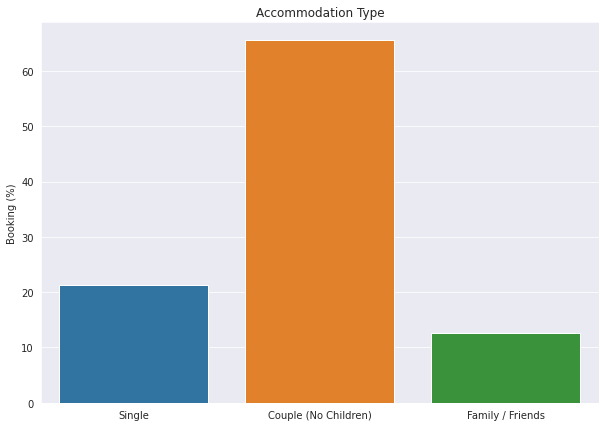

In [34]:
## Select single, couple, multiple adults and family
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
#n_adults = df_not_canceled[(df_not_canceled.adults>2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]


## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]


## Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))

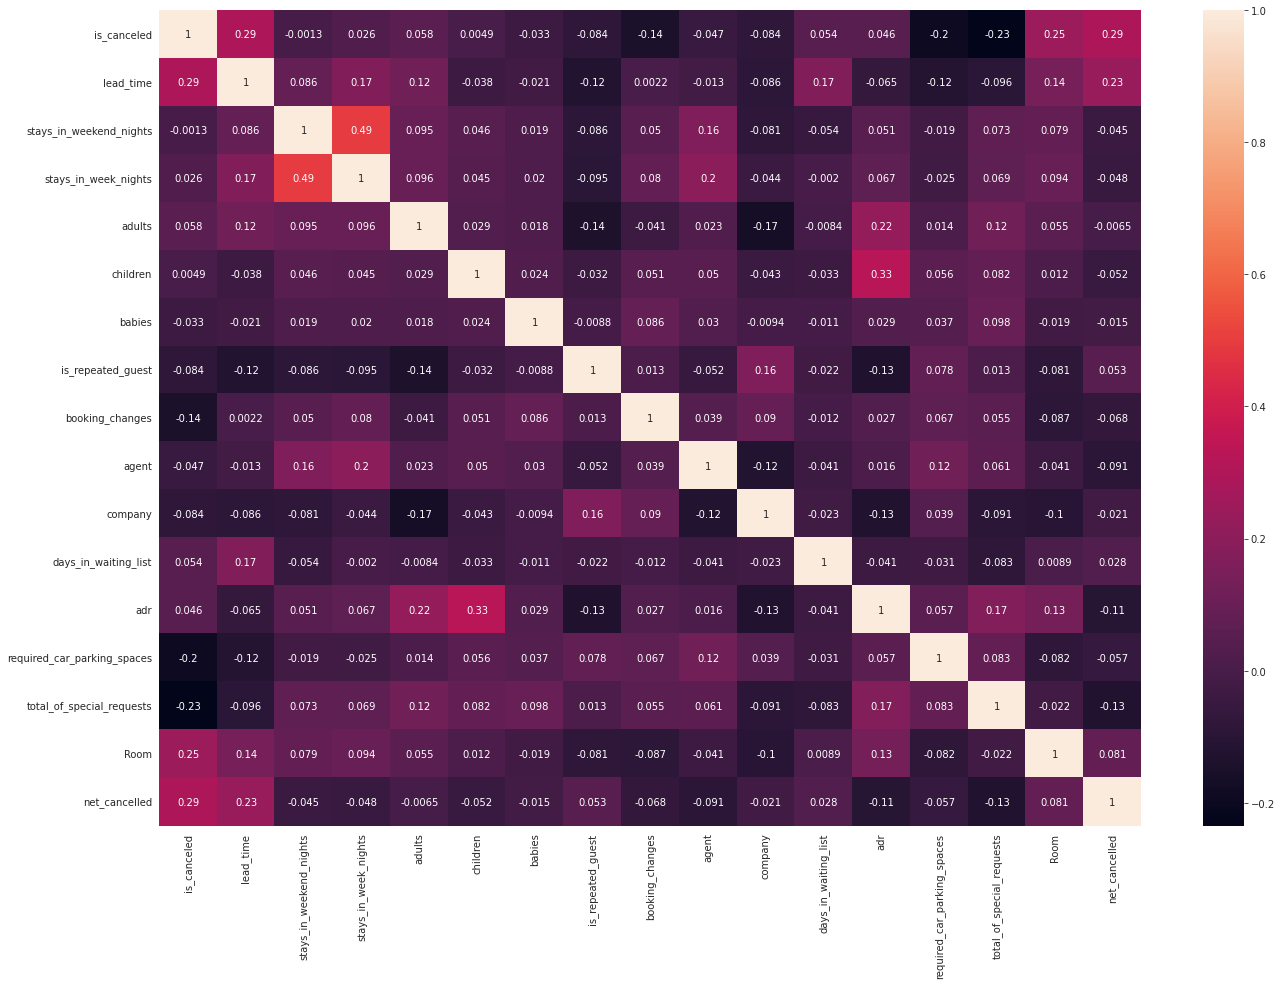

In [35]:
# lets see the correlation factor
## Copy the dataframe
df_subset = df.copy()
## Remove reservation_status column
## because it tells us if booking was cancelled 
df_subset = df_subset.drop(['reservation_status'], axis=1)
## Make the new column which contain 1 if guest received the same room which was reserved otherwise 0
df_subset['Room'] = 0
df_subset.loc[ df_subset['reserved_room_type'] == df_subset['assigned_room_type'] , 'Room'] = 1


## Make the new column which contain 1 if the guest has cancelled more booking in the past
## than the number of booking he did not cancel, otherwise 0

df_subset['net_cancelled'] = 0
df_subset.loc[ df_subset['previous_cancellations'] > df_subset['previous_bookings_not_canceled'] , 'net_cancelled'] = 1
## Remove the less important features
df_subset = df_subset.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date','previous_cancellations','previous_bookings_not_canceled'],axis=1)
## Plot the heatmap to see correlation with columns
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(), annot=True, ax=ax);

In [36]:
df_subset.corr()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Room,net_cancelled
is_canceled,1.000000,0.292876,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877,0.246768,0.292888
lead_time,0.292876,1.000000,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949,0.141136,0.233977
stays_in_weekend_nights,-0.001323,0.085985,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124,0.079274,-0.045160
stays_in_week_nights,0.025542,0.166892,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738,0.094213,-0.048033
adults,0.058182,0.117575,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353,0.054619,-0.006475
children,0.004851,-0.037878,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747,0.012466,-0.051553
babies,-0.032569,-0.021003,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939,-0.018842,-0.015418
is_repeated_guest,-0.083745,-0.123209,-0.086009,-0.095302,-0.140973,-0.032475,-0.008813,1.000000,0.013044,-0.051584,0.161871,-0.022057,-0.130807,0.077928,0.012963,-0.081126,0.052960
booking_changes,-0.144832,0.002230,0.050191,0.080018,-0.041472,0.051000,0.085605,0.013044,1.000000,0.038555,0.089768,-0.011916,0.026601,0.067490,0.055003,-0.087409,-0.068165
agent,-0.046770,-0.013114,0.162411,0.196777,0.023370,0.050461,0.030235,-0.051584,0.038555,1.000000,-0.121333,-0.041182,0.015711,0.119282,0.060783,-0.041118,-0.090574


In [37]:
corr = df_subset.corr()

corr.style.background_gradient(cmap='coolwarm')

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Room,net_cancelled
is_canceled,1.000000,0.292876,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877,0.246768,0.292888
lead_time,0.292876,1.000000,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949,0.141136,0.233977
stays_in_weekend_nights,-0.001323,0.085985,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124,0.079274,-0.045160
stays_in_week_nights,0.025542,0.166892,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738,0.094213,-0.048033
adults,0.058182,0.117575,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353,0.054619,-0.006475
children,0.004851,-0.037878,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747,0.012466,-0.051553
babies,-0.032569,-0.021003,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939,-0.018842,-0.015418
is_repeated_guest,-0.083745,-0.123209,-0.086009,-0.095302,-0.140973,-0.032475,-0.008813,1.000000,0.013044,-0.051584,0.161871,-0.022057,-0.130807,0.077928,0.012963,-0.081126,0.052960
booking_changes,-0.144832,0.002230,0.050191,0.080018,-0.041472,0.051000,0.085605,0.013044,1.000000,0.038555,0.089768,-0.011916,0.026601,0.067490,0.055003,-0.087409,-0.068165
agent,-0.046770,-0.013114,0.162411,0.196777,0.023370,0.050461,0.030235,-0.051584,0.038555,1.000000,-0.121333,-0.041182,0.015711,0.119282,0.060783,-0.041118,-0.090574
